# CMSE 201: Quiz 4 (Spring 2024)

## <p style="text-align: right;"> &#9989; Mark Endicott</p>


The goal of this quiz is to give you the opportunity to test out more of the skills that you've developed thus far this semester. In particular, you'll reflect on what you know about writing code using Python and showcase some of your more recently acquired programming skills.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.**

**Do your own work.** This quiz is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. Any violation of academic integrity could result in you receiving a zero on the quiz.

**If ChatGPT is used**, _you must cite it_ with the access date and the prompt as described in the course [Generative AI policy](https://msu-cmse-courses.github.io/cmse201-S24-jb/Course_Materials-201/AI_Policy/CMSE201_GenerativeAI_Policy.html). Without appropriate citation, you may **receive partial or no credit.**


There are a total of **39 points** possible on this quiz and each part of the quiz can be done independently. **If you get stuck _move on to another part of the quiz to earn some points there!_**


![Moira](https://media.giphy.com/media/26gs78HRO8sOuhTkQ/giphy.gif)

---
<a id="toc"></a>

## Table of Contents

[Part 0. Academic Integrity Statement](#part_0) (1 point)

[Part 1. Curve_fit](#part_1)  (18 points)

[Part 2. Solve_ivp](#part_1)  (20 points)


In [1]:
points_list = [1, 18, 20]

print(f"The total number of points is : {sum(points_list)}")

The total number of points is : 39


---
<a id="part_0"></a>

# Part 0. Academic integrity statement (1 points)

[Back to Top](#toc)

In the markdown cell below, put your personal academic integrity statement. By including this statement, you are confirming that you are submitting this as your own work and not that of someone else.


<font size=+3>&#9998;</font> *I, Mark Endicott, commit to bring a serious, honest, and effortful intention to the tools of data science and the responsibilities associated with my education. I will maintian academic integrity because it allows me to thrive later. I value the impact of the skills I acquire and I will to use them to help people to the best of my ability. I am aware of MSU's ethical standards for integrity*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp


---
<a id="part_1"></a>

# Part 1. Fitting a model to data with `curve_fit` and visualizing the results (18 points)
[Back to Top](#toc)

We have studied building ordinary differential equations (ODEs) and solving it by `solve_ivp`. Using `curve_fit` to fit the numerical solution can always give us inspiration to find the true solution. In previous assignments, you have used `solve_ivp` to compute the numeric solution of the logistic model of the growth of a single population. Recall, the Logistic population model is described by the following differential equations:

\begin{equation}
\frac{dP}{dt} = kP\Big(1-\frac{P}{C}\Big),
\end{equation}

where $P =$ population, $k =$ growth rate, and $C =$ the carrying capacity. 

Examples code for computing the solution for for $P_0 =0.1$ billion (initial population), $k=1$, and $C =1$ billion is provided below:


Text(0, 0.5, 'p_solution')

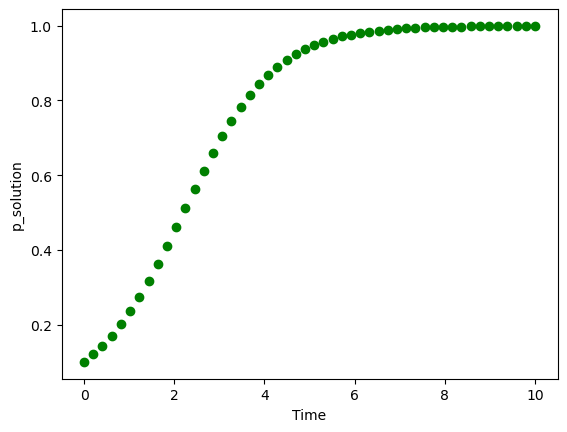

In [3]:
# example code to compute a numeric solution of the logistic model

# define the derivative
def logistic(time, current_state):
    p = current_state   
    dpdt = p*(1-p)    
    return dpdt

# compute numeric solution
initial_p = [0.1]
time = np.linspace(0,10,50)

result = solve_ivp(logistic, (0,20), initial_p, t_eval = time)

# unpack solution
numerical_p = result.y[0,:]

# Make a plot of the result 
fig1 = plt.figure(1)
plt.scatter(time,numerical_p, color="green")
plt.xlabel("Time")
plt.ylabel("p_solution")

---

#### &#9989;&nbsp; **Question 2.1 (8 points):** 

Using the time array `time` and numerical solution `numeriical_p` data and provided model below, use `curve_fit` to find best fit parameters for *a, b,* *c*,and *d*. Make sure you give `curve_fit` a good starting point for finding the best fit parameters using the `p0` argument and these starting values:
* a = 0.1
* b = 3
* c = -0.1
* d = 1



In [5]:
# Will need to use NumPy for the function
import numpy as np

# Will need to import curve_fit from SciPy
from scipy.optimize import curve_fit

# This function defines the logistic function
def logistic_f(t,a,b,c,d):
    return a/(b*np.exp(c*t)+d)

In [12]:
################################################################

# GENERATED BY CHAT GPT

# Generate some example data
np.random.seed(0)
time = np.linspace(0, 10, 100)
numerical_p = 0.5 / (1 + np.exp(-time))

# Add noise to the data
numerical_p += np.random.normal(0, 0.02, size=numerical_p.shape)

################################################################

p0 = [0.1, 3, -0.1, 1]

parameters, __ = curve_fit(logistic_f, time, numerical_p, p0=p0)

#These are the best fit parameters.
a = parameters[0]
b = parameters[1]
c = parameters[2]
d = parameters[3]

print(a,b,c,d)

-2.717427946831613 -4.4664402826556255 -0.9087607841498891 -5.441854239994407


&#9989;&nbsp; **Part 2.2 (10 points)**

Now that you have a set of best fit parameters, **use those parameters to calculate the expected model values and plot the expected model values on top of the actual data values**. Make sure to label your axes and include a legend to communicate what parts of the plot correspond to the model versus the data.

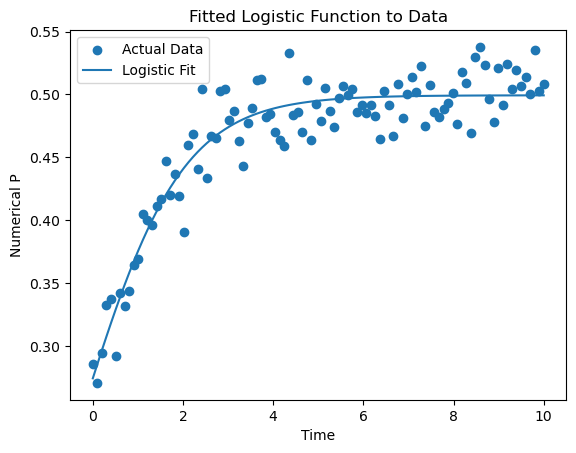

In [21]:
expected = logistic_f(time, a, b, c, d)

plt.scatter(time, numerical_p, label = "Actual Data")
plt.plot(time, expected, label = "Logistic Fit")

# GPT Used For Time-Efficiency
plt.xlabel('Time')
plt.ylabel('Numerical P')
plt.title('Fitted Logistic Function to Data')
plt.legend()
plt.show()

---
## Part 2: Modeling a system using `solve_ivp` (20 points)

Now you wonder: what happens if there are two different species competing for the same resources? (Such as the great white sharks and the seven-gill sharks &#x1F609;) How would the population growth of one species interfere with that of the other? 

Luckily, such models already exist. One of them is a generalization of the logistic model to take into account resource competition between two species $u$ and $v$ and we have the following competitive Lotka-Volterra model:

$$ \frac{du}{dt} = r_1u(1-(\frac{u +a_{12} v}{K_1}))$$
$$ \frac{dv}{dt} = r_2v(1 -(\frac{v + a_{21}u}{K_2})).$$

Here, $a_{12}$ represents the competitive effect species $v$ has on the population of species $u$ and $a_{21}$ represents the competitive effect species u has on the population of species v. These values do not have to be equal. Because this is the competitive version of the model, all interactions must be harmful (competition) and therefore all a-values are positive.

After scaling, the **two species competitive Lotka-Volterra model** can become to the simplified case:
\begin{align}
\frac{du}{dt} &= u(1-u -\alpha v)  &(1)\\
\frac{dv}{dt} &= rv(1 -v-\beta u). &(2)
\end{align}

We say that the competition on the species u (resp.
on the species v) is **strong** if $\alpha > 1$ (resp. $\beta > 1$).We say that the competition on the species
u (resp. on the species v) is **weak** if $0 < \alpha < 1$ (resp. $0 < \beta< 1$). 

**Your job for this part is implementing and computing the numeric solutions for the two species competitive Lotka-Volterra model as described by equations 1 and 2 above. You can do so by adapting the code for the logistic model above.**

&#9989;&nbsp; **Part 2.1 (8 points)**  
Define the derivative function for the two species competitive Lotka-Volterra model in the cell below (to be used as an input later for `solve_ivp` -- so pay attention to the format).

In [25]:
# Again, GPT Helped Here

def derivs(t, y, alpha, beta, r):
    u,v = y
    dudt = u * (1 - u - alpha * v)
    dvdt = r * v * (1 - v - beta * u)
    return [dudt, dvdt]

&#9989;&nbsp; **Part 2.2 (6 points)**

Using `solve_ivp`, compute the numeric solution for two species competitive Lotka-Volterra model with the parameters $r=1$, $\alpha=1/3,$ $\beta =3/4$, the initial conditions $[u_0,v_0]= [0.5,0.9]$, and the final time equal 30. Unpack the result you get from `solve_ivp` into separate variables `u` and `v`.

In [28]:
# GPT Assisted

r = 1
alpha = 1/3
beta = 3/4
initial_conditions = [0.5, 0.9]

t_start = 0
t_end = 30
num_points = 1000
t_points = np.linspace(t_start, t_end, num_points)

sol = solve_ivp(derivs, [t_start, t_end], initial_conditions, args=(alpha, beta, r), t_eval=t_points)

u, v = sol.y

&#9989;&nbsp; **Part 2.3 (4 points)**

Plot the solutions of $u$ and $v$ as a function of time in the cell below. Be sure to add appropriate axis labels and legends. 

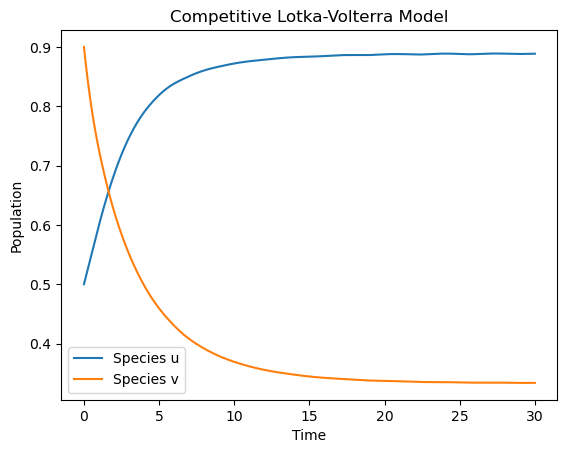

In [31]:
plt.plot(sol.t, sol.y[0], label='Species u')
plt.plot(sol.t, sol.y[1], label='Species v')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Competitive Lotka-Volterra Model')
plt.legend()
plt.show()

&#9989;&nbsp; **Part 2.4 (2 points)**

When $0 < \alpha,\beta <1$, we call the model a weak competitive Lotka-Volterra model. Check with the plot above to see what will happen as time goes on. Can the two species, i.e. $u$ and $v$, coexist or one species will die out?

I've set alpha = 1/3 & beta = 3/4. This means that alpha indicates a stronger competive model and that the species are less likely to co-exist.

Looking at the plot, it's very clear that the rising in one population signifigantly effects the other. Especially after time = 10. Therefore, with these parameters, one will die out.

---

# Congratulations, you're done!

Submit this quiz by uploading it to the course Desire2Learn web page.  

Go to the **Quizzes** section, find the submission folder link for **Quiz 04**, and upload it there.


![Moira2](https://media.giphy.com/media/d1E2HnwywoTkES08/giphy.gif)